<a href="https://colab.research.google.com/github/VMVoron/ITMO/blob/main/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0_%D0%B8%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os

import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2, rc={'axes.labelsize': 16, 'legend.fontsize': 14,
                                              'grid.color': '.6', 'grid.linestyle': ':'})

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Задаем рабочую папку
#os.chdir("/Econom_Cities_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Импорт данных
df = pd.read_csv("/content/drive/MyDrive/Analysis_fall_2023/Econom_Cities_data.csv", sep=";", decimal=",", index_col='City')

In [ ]:
na_counts = df.isna().sum()
print(na_counts)

Work      0
Price     0
Salary    0
dtype: int64


In [ ]:
# Получите список всех признаков
features = df.columns

In [ ]:
print(features)

Index(['Work', 'Price', 'Salary'], dtype='object')


In [ ]:
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [ ]:
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1384.958333,68.860417,-378.727083
std,2404.897007,21.784659,2027.338052
min,-9999.000000,30.300000,-9999.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


In [ ]:
df.replace(-9999, np.nan, inplace=True)

# Replace NaN
for column in features:
    if pd.api.types.is_numeric_dtype(df[column]):
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

In [ ]:
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1879.913043,68.860417,39.545652
std,170.592812,21.784659,24.225217
min,1583.000000,30.300000,2.700000
25%,1747.750000,49.650000,15.525000
50%,1862.000000,70.500000,40.472826
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


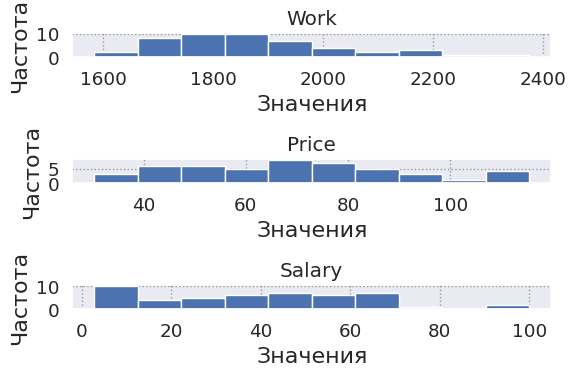

In [ ]:
fig, axs = plt.subplots(nrows=len(features), figsize=(6, 4))

for i, col in enumerate(features):
    axs[i].hist(df[col])
    axs[i].set_xlabel('Значения')
    axs[i].set_ylabel('Частота')
    axs[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1879.913043,68.860417,39.545652
std,170.592812,21.784659,24.225217
min,1583.000000,30.300000,2.700000
25%,1747.750000,49.650000,15.525000
50%,1862.000000,70.500000,40.472826
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


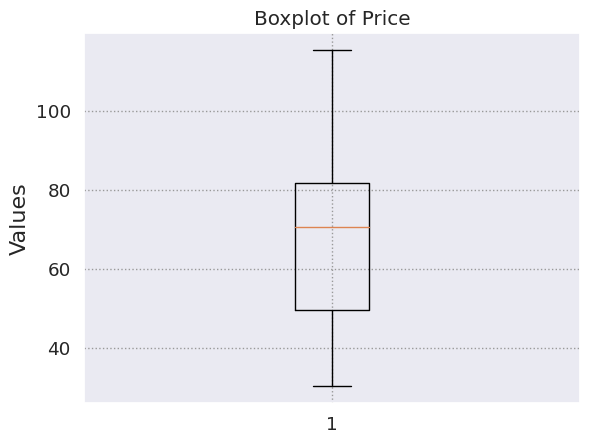

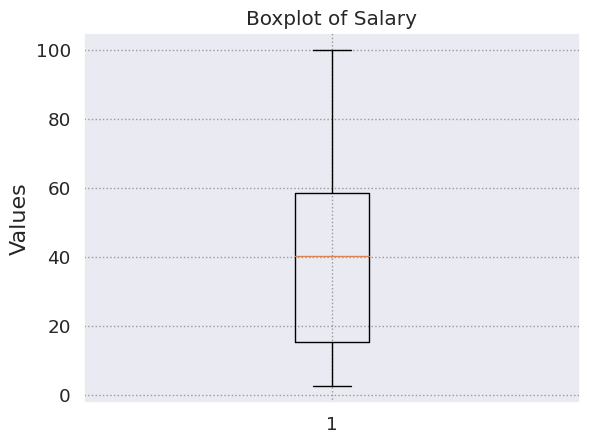

In [ ]:
# Построение боксплот для каждого столбца
for column in df.columns[1:]:
    plt.figure()  # Создаем новую фигуру для каждого столбца
    plt.boxplot(df[column])  # Построение боксплота

    # Установка заголовка и метки оси Y
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')

    # Отображение графика
    plt.show()

Явных выбросов не наблюдается. Однако из-за того, что у данных разный масштаб, их лучше стандартизирировать. При стандартизации мы не вводим данные в определенный диапазон. Вместо этого мы преобразуем, чтобы получить среднее значение 0 и стандартное отклонение 1: \[z = {x - \mu}/{\sigma}
Это не только помогает с масштабированием, но и централизует данные

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in features:
  df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

#df_standardized = (df - df.mean()) / df.std(ddof=0)
# ddof=0 для расчета поправки Bessel

In [ ]:
df.to_csv('cities_st.csv', index=False)
from google.colab import files

files.download('cities_st.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

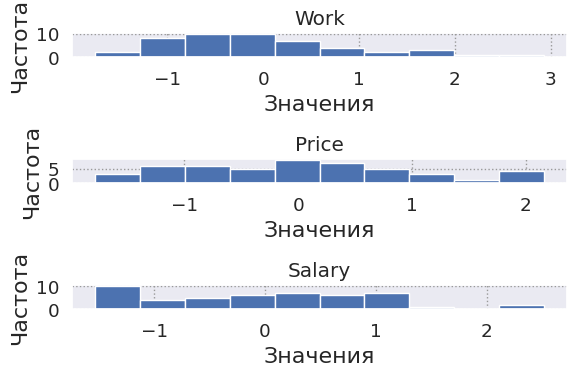

In [ ]:
fig, axs = plt.subplots(nrows=len(features), figsize=(6, 4))

for i, col in enumerate(features):
    axs[i].hist(df[col])
    axs[i].set_xlabel('Значения')
    axs[i].set_ylabel('Частота')
    axs[i].set_title(f'{col}')

plt.tight_layout()
plt.show()



,Work,Price,Salary
Work,1.000000,-0.434418,-0.457187
Price,-0.434418,1.000000,0.772257
Salary,-0.457187,0.772257,1.000000


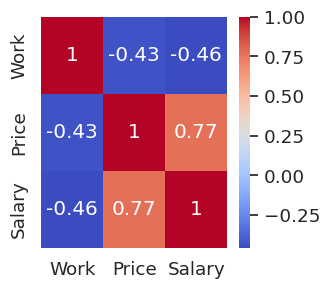

In [ ]:
corr_matrix = df.corr()
display(corr_matrix)
fig = plt.subplots(figsize=(3,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Наблюдается мультиколлинеарность переменных Price и Salary. Проведем анализ для трех переменных, а потом сократим количество до двух и посмотрим на изменение качества кластеризации

## Иерархический кластерный анализ (3 фактора)

In [ ]:
#  Активируем 3 процедуры иерархического кластерного анализа
#  Эта ячейка обычно вторая в скрипте

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Для проведения иерархического кластерного анализа
используем команду linkage из библиотеки scipy.

Три аргумента этой команды:
таблица данных,
способ вычисления расстояний между кластерами (ward, single(default), complete, average, weighted, centroid, median, weighted)
и способ вычисления расстояний между объектами (euclidean (default), cityblock, hamming, cosine)


In [ ]:
#  Кластеризуем
link = linkage(df, 'ward', 'euclidean')

Глядя на распределения, можно заметить, что Price в чем-то похоже на Salary.

В объекте ```link```  хранится история объединения кластеров. Это матрица numpy ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы описывает слияние очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. Столбец ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- объем нового кластера.

In [ ]:
#  link точно матрица numpy?

print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(47, 4)


In [ ]:
link[:15]

array([[22.        , 35.        ,  0.12815494,  2.        ],
       [28.        , 46.        ,  0.20763543,  2.        ],
       [27.        , 30.        ,  0.23765034,  2.        ],
       [ 7.        , 39.        ,  0.26826881,  2.        ],
       [ 2.        , 19.        ,  0.28255549,  2.        ],
       [ 4.        , 41.        ,  0.28279315,  2.        ],
       [ 6.        , 17.        ,  0.3015326 ,  2.        ],
       [ 8.        , 45.        ,  0.31426955,  2.        ],
       [11.        , 12.        ,  0.31525981,  2.        ],
       [ 1.        , 32.        ,  0.34756566,  2.        ],
       [20.        , 36.        ,  0.39562902,  2.        ],
       [ 0.        , 53.        ,  0.41558309,  3.        ],
       [10.        , 48.        ,  0.45032652,  3.        ],
       [13.        , 47.        ,  0.45273309,  2.        ],
       [38.        , 57.        ,  0.4876533 ,  3.        ]])

In [ ]:
h = 0.7*max(link[:,2])

In [ ]:
print(h)

8.780759676689174


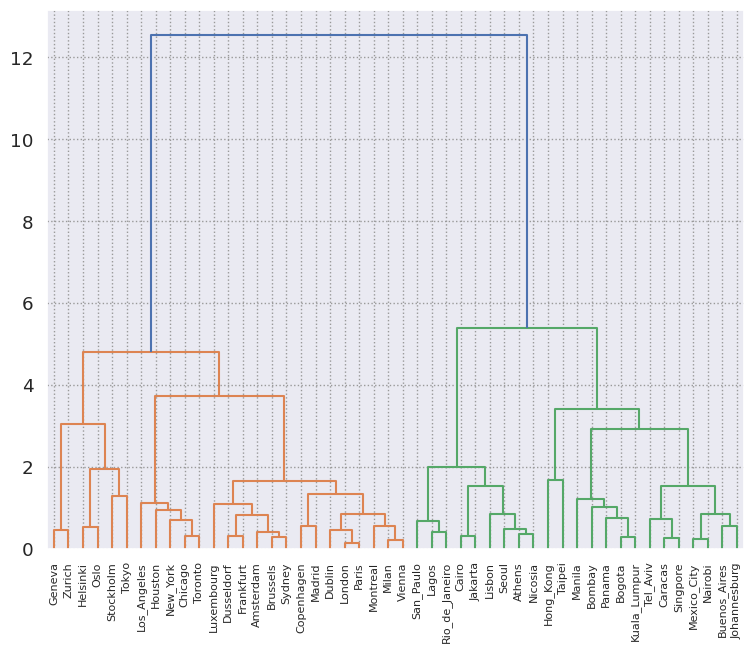

In [ ]:
# Построим дендрограмму. Вариант 1
#  Пороговое значение определяется убого,
#  по формуле h = 0.7*max(link[:,2]).
fig = plt.figure(figsize=(9,7))

#dn = dendrogram(link, color_threshold = h, labels=df.index.tolist())

#  Еще варианты
#  dn = dendrogram(link, orientation = "right")
#  dn = dendrogram(link, labels= df.index.tolist())
#fig = plt.figure(figsize=(8,6))
dn = dendrogram(link, labels= df.index.tolist())

Добавим к таблице данных df столбец ```cluster```, содержащий код того кластера, в который попал объект. Это сделаем с помощью команды ```fcluster```. <br>
Первый аргумент команды это объект ```link```, содержащий результаты кластеризации.  <br>
Третий аргумент ```criterion``` указывает, как разбивать на кластеры (```distance```, если остановка объединений по расстоянию между кластерами или ```maxclust```, если будет заданно число кластеров).  <br>
Вторым  аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от значения аргумента ```criterion```.

In [ ]:
# Информация о кластерах добавляется в таблицу данных в виде столбца

# Останавливаем объединение, когда расстояние между кластерами превысит 3.1
df['cluster'] = fcluster(link, h, criterion='distance')


# Останавливаем объединение, когда останется 3 кластера
#   df['cluster'] = fcluster(link, 3, criterion='maxclust')


In [ ]:
#  Все хорошо?
print(df)

                    Work     Price        Salary  cluster
City                                                     
Amsterdam      -0.982860 -0.151250  3.943988e-01        1
Athens         -0.520792 -0.698647 -3.815212e-01        2
Bogota          1.611828 -1.436242 -1.169956e+00        2
Bombay          1.019434 -1.788804 -1.428596e+00        2
Brussels       -1.018403  0.229145  4.569730e-01        1
Buenos_Aires    0.539594 -0.591951 -1.128240e+00        2
Cairo           0.000000 -1.473354 -2.964109e-16        2
Caracas         0.954270 -0.364642 -1.194986e+00        2
Chicago         0.261169  0.233784  9.325369e-01        1
Copenhagen     -0.965088  1.040964  9.742530e-01        1
Dublin         -0.716282  0.331203  7.735621e-02        1
Dusseldorf     -1.107262  0.447177  8.616195e-01        1
Frankfurt      -1.361992  0.261618  8.699627e-01        1
Geneva          0.000515  1.254356  2.117275e+00        1
Helsinki       -1.261285  2.075453  1.128603e+00        1
Hong_Kong     

In [ ]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,-0.537142,0.747410,0.812895
2,0.583850,-0.812403,-0.883582


In [ ]:
df.groupby(fcluster(link, 2, criterion='maxclust')).mean()

,Work,Price,Salary,cluster
1,-0.537142,0.747410,0.812895,1.0
2,0.583850,-0.812403,-0.883582,2.0


Получили два кластера.
В 1 кластере мало Work, зато высокий Price и Salary.
Во 2 кластере много Work, но гораздо ниже Price и Salary.
Можно предположить, что в 1 кластере находятся более развитые города с точки зрения экономического развития, а во 2 кластере - менее развитые.


In [ ]:
#  1 вариант. Применяем вызов groupy, затем метод size.
df.groupby('cluster').size()

cluster
1    25
2    23
dtype: int64

In [ ]:
#  Какие наблюдения попали в 1-й кластер?
df[df['cluster']==1].index.values

array(['Amsterdam', 'Brussels', 'Chicago', 'Copenhagen', 'Dublin',
       'Dusseldorf', 'Frankfurt', 'Geneva', 'Helsinki', 'Houston',
       'London', 'Los_Angeles', 'Luxembourg', 'Madrid', 'Milan',
       'Montreal', 'New_York', 'Oslo', 'Paris', 'Stockholm', 'Sydney',
       'Tokyo', 'Toronto', 'Vienna', 'Zurich'], dtype=object)

In [ ]:
#  Какие наблюдения попали в 1-й кластер?
df[df['cluster']==2].index.values

array(['Athens', 'Bogota', 'Bombay', 'Buenos_Aires', 'Cairo', 'Caracas',
       'Hong_Kong', 'Jakarta', 'Johannesburg', 'Kuala_Lumpur', 'Lagos',
       'Lisbon', 'Manila', 'Mexico_City', 'Nairobi', 'Nicosia', 'Panama',
       'Rio_de_Janeiro', 'San_Paulo', 'Seoul', 'Singpore', 'Taipei',
       'Tel_Aviv'], dtype=object)

**Каменистая осыпь, она же локоть**

График, помогающий определить число кластеров. Особенно полезен, если данных много.
Будем использовать второй столбец матрицы ```link``` где  хранятся расстояния между объединяемыми кластерами.

In [ ]:
dist = link[:, 2]
dist

array([ 0.12815494,  0.20763543,  0.23765034,  0.26826881,  0.28255549,
        0.28279315,  0.3015326 ,  0.31426955,  0.31525981,  0.34756566,
        0.39562902,  0.41558309,  0.45032652,  0.45273309,  0.4876533 ,
        0.51963556,  0.55205266,  0.55467922,  0.55620134,  0.66478169,
        0.70746443,  0.71864533,  0.73512154,  0.8157797 ,  0.83627352,
        0.84422053,  0.85098594,  0.93770856,  1.00649606,  1.0959329 ,
        1.11842783,  1.21107288,  1.29239334,  1.33846149,  1.52929507,
        1.53020419,  1.64816499,  1.68491011,  1.94755917,  2.00350665,
        2.92692821,  3.03823274,  3.42161715,  3.73741732,  4.80285427,
        5.39146247, 12.5439424 ])

На графике "Каменистая осыпь" показывается зависимость расстояний между кластерами от шага объединения (обратного). На графике находим момент, начиная с которого расстояние перестанет значительно меняться.

Text(0, 0.5, 'Расстояние')

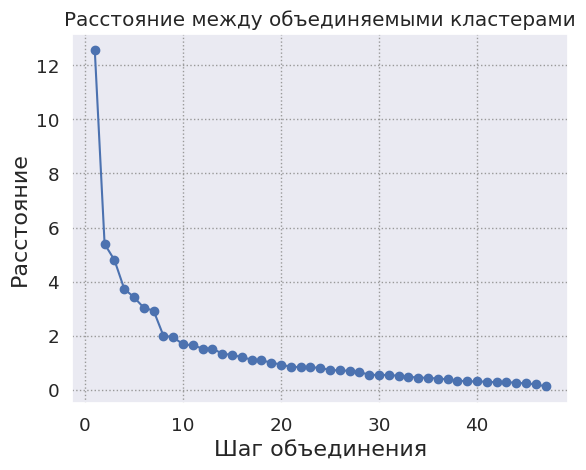

In [ ]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Из картинки видно, что уменьшение расстояния снижается примерно на седьмом кластере, то есть нет смысл выделять больше 8 кластеров.


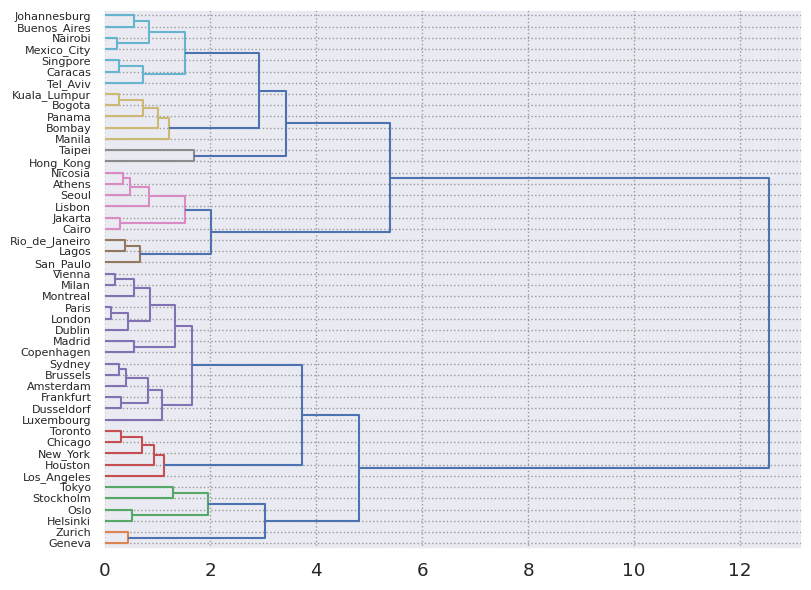

In [ ]:
# Построим дендрограмму. Вариант 1
#  Пороговое значение определяется убого,
#  по формуле h = 0.7*max(link[:,2]).
fig = plt.figure(figsize=(9,7))

dn = dendrogram(link, color_threshold = 2, labels=df.index.tolist(), orientation = "right")

#  Еще варианты
#  dn = dendrogram(link, orientation = "right")
#  dn = dendrogram(link, labels= df.index.tolist())
#fig = plt.figure(figsize=(8,6))
#dn = dendrogram(link, labels= df.index.tolist())

In [ ]:
df['cluster2'] = fcluster(link, 2, criterion='distance')

Такая классификация тоже не лишена смысла.

In [ ]:
#  1 вариант. Применяем вызов groupy, затем метод size.
df.groupby('cluster2').size()

cluster2
1     2
2     4
3     5
4    14
5     3
6     6
7     2
8     5
9     7
dtype: int64

In [ ]:
df[df['cluster2']==1].index.values

array(['Geneva', 'Zurich'], dtype=object)

Женева и Цюрих - самые дорогие города Европы

In [ ]:
df[df['cluster2']==2].index.values

array(['Helsinki', 'Oslo', 'Stockholm', 'Tokyo'], dtype=object)

Большинство городов 2 кластера - города Северной Европы. + Токио

In [ ]:
df[df['cluster2']==3].index.values

array(['Chicago', 'Houston', 'Los_Angeles', 'New_York', 'Toronto'],
      dtype=object)

Города 3 кластера - города США и Торонто (Канада)

In [ ]:
df[df['cluster2']==4].index.values

array(['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'Dusseldorf',
       'Frankfurt', 'London', 'Luxembourg', 'Madrid', 'Milan', 'Montreal',
       'Paris', 'Sydney', 'Vienna'], dtype=object)

Города 4 кластера - города Западной Европы и Сидней.

In [ ]:
df[df['cluster2']==5].index.values

array(['Lagos', 'Rio_de_Janeiro', 'San_Paulo'], dtype=object)

Города 5 кластера - крупные города Бразилии и  портовый город на юго-западе Нигерии

In [ ]:
df[df['cluster2']==6].index.values

array(['Athens', 'Cairo', 'Jakarta', 'Lisbon', 'Nicosia', 'Seoul'],
      dtype=object)

В 6 кластере города, которые находятся в непосредственной близости от торговых портов

In [ ]:
df[df['cluster2']==7].index.values

array(['Hong_Kong', 'Taipei'], dtype=object)

В 7 кластере два азиатских города: Гонгонг и Тайпей

In [ ]:
FA = FactorAnalysis(n_components=2)
factors = FA.fit_transform(df)
df_factored=pd.DataFrame(factors, index=df.index, columns=['factor1', 'factor2'])
df_factored.head()

,factor1,factor2
City,,
Amsterdam,0.585708,-0.650572
Athens,-0.561774,-0.519483
Bogota,-1.280138,0.514444
Bombay,-1.365723,-0.106848
Brussels,0.652337,-0.575142


Теперь, когда факторов 2, мы можем сделать визуализацию

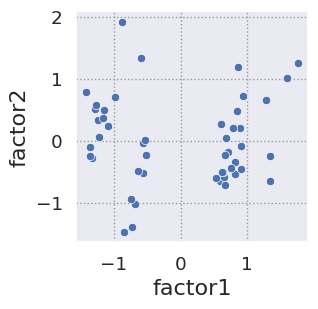

In [ ]:
fig = plt.subplots(figsize=(3,3))
sns.scatterplot(df_factored, x='factor1', y='factor2')
plt.show()

## Иерархический кластерный анализ

В объекте `link` хранится история объединения кластеров. Это матрица numpy `(n-1)*4`, где `n` - число наблюдений. Каждая строка матрицы описывает слияние очередной пары кластеров с номерами `link[i,0]` и `link[i,1]`. Новому кластеру присаивается номер `n + i`. Столбец `link[i,2]` содержит расстояние между объединяемыми кластерами, а `link[i,3]` - объем нового кластера.

In [ ]:
#  Кластеризуем
link1 = linkage(df_factored, 'ward', 'euclidean')

In [ ]:
dist2 = link1[:, 2]
dist2

array([0.02076336, 0.03849336, 0.05684984, 0.05839193, 0.07485464,
       0.07890521, 0.07946375, 0.08777082, 0.08997718, 0.10153025,
       0.10487996, 0.11217128, 0.14293511, 0.14611755, 0.15027013,
       0.16915414, 0.17327674, 0.18229314, 0.18890698, 0.22747073,
       0.23702336, 0.24100533, 0.26286435, 0.28851533, 0.28946076,
       0.3002113 , 0.3121429 , 0.38061277, 0.40007062, 0.40708515,
       0.45878171, 0.52072443, 0.65114796, 0.65343806, 0.65620991,
       0.72105325, 0.7861036 , 0.82032693, 1.174592  , 1.26448161,
       1.44593292, 1.88012734, 2.0395611 , 2.64449898, 3.72703414,
       4.18780187, 9.07381581])

In [ ]:
h = 0.7*max(link1[:,2])

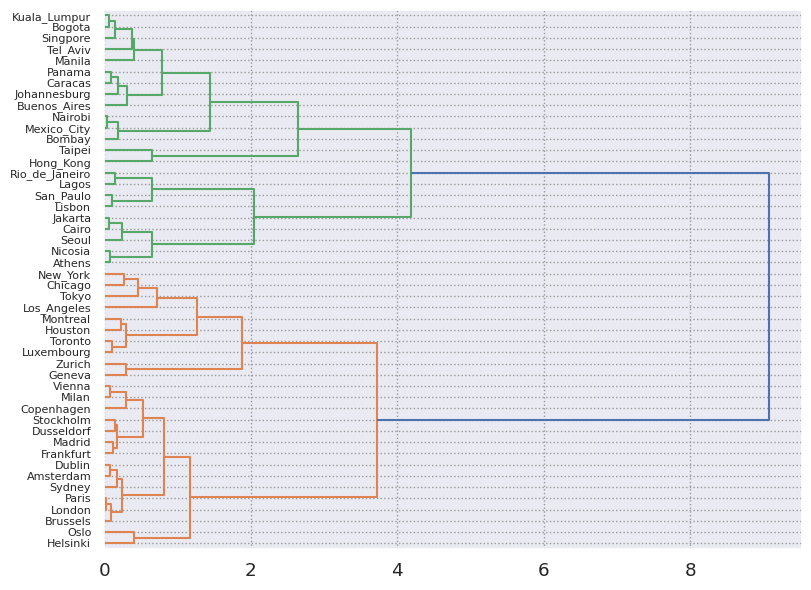

In [ ]:
fig = plt.figure(figsize=(9,7))

dn = dendrogram(link1, color_threshold = h, labels=df.index.tolist(), orientation = "right")

Снова получили два кластера, схожих по составу

Что делаю: строю дендрограмму и по ней смотрю на каком расстоянии оптимально прервать соединение кластеров.

Text(0, 0.5, 'Расстояние')

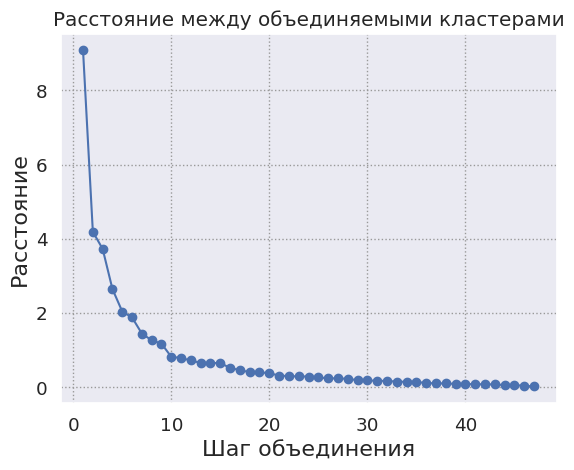

In [ ]:
dist_rev = dist2[::-1]
idxs = range(1, len(dist2) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

С двумя факторами количество эффетривных кластеров немного снижается, острый склон заканчивается на 5 кластерах

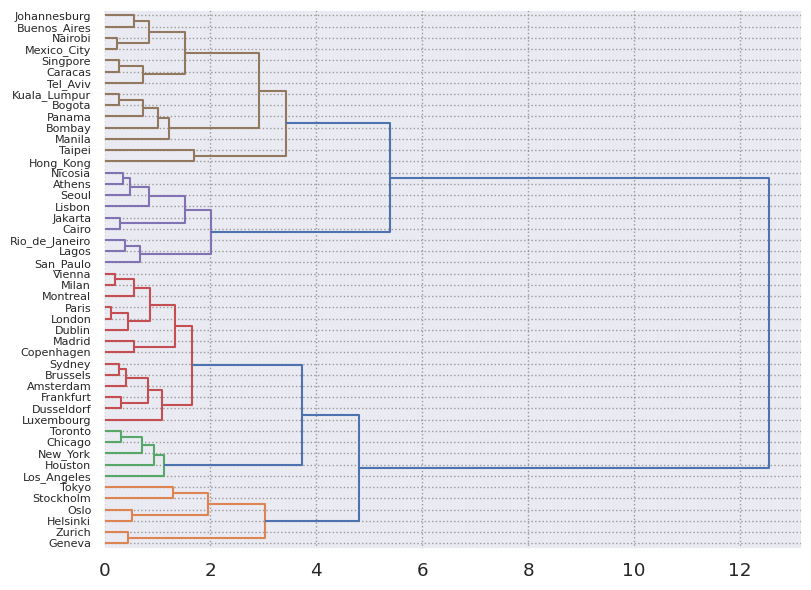

In [ ]:
fig = plt.figure(figsize=(9,7))

dn = dendrogram(link, color_threshold = 3.5, labels=df_factored.index.tolist(), orientation = "right")

Получили 5 кластеров: Северная Европеа + Токио, США + Торонто, Европейские города, Портовые торговые города с более высокими доходами, города с более низкими доходами.

Тут от 3 до 7 кластеров

In [ ]:
# получаем наборы кластеров в зависимости от числа кластеров
def get_results_for_n_clusters(n):
    df_hierarchy = df_factored.copy()
    link1 = linkage(df_factored, 'ward', 'euclidean')
    df_hierarchy['cluster']=fcluster(link1, n, criterion='maxclust')
    print(f' {n} кластеров:')

    fig = sns.scatterplot(df_hierarchy, x='factor1', y='factor2', hue='cluster', palette="deep")
    legend = fig.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    legend.get_frame().set_linewidth(1)
    plt.show()

    display(df_hierarchy.groupby('cluster').mean()) # средние значения по столбцам

    # кто в какой кластер попал
    for num in range(1,n+1):
        print(f'cluster{num}:', list(df_hierarchy[df_hierarchy['cluster']==num].index))

 5 кластеров:


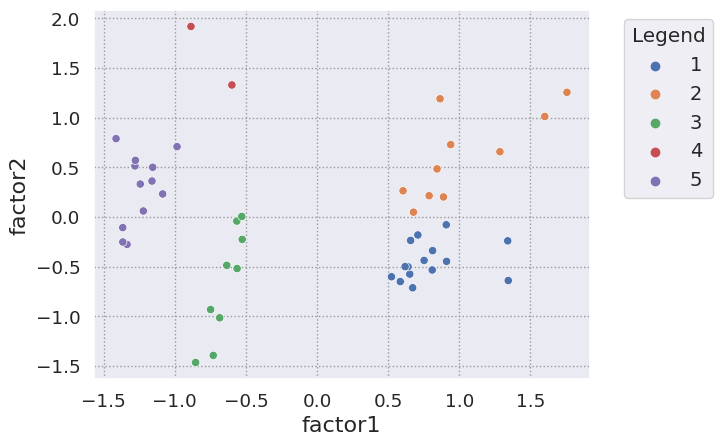

,factor1,factor2
cluster,,
1,0.796212,-0.444992
2,1.025527,0.606189
3,-0.647703,-0.674981
4,-0.742308,1.625013
5,-1.240376,0.286483


cluster1: ['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'Dusseldorf', 'Frankfurt', 'Helsinki', 'London', 'Madrid', 'Milan', 'Oslo', 'Paris', 'Stockholm', 'Sydney', 'Vienna']
cluster2: ['Chicago', 'Geneva', 'Houston', 'Los_Angeles', 'Luxembourg', 'Montreal', 'New_York', 'Tokyo', 'Toronto', 'Zurich']
cluster3: ['Athens', 'Cairo', 'Jakarta', 'Lagos', 'Lisbon', 'Nicosia', 'Rio_de_Janeiro', 'San_Paulo', 'Seoul']
cluster4: ['Hong_Kong', 'Taipei']
cluster5: ['Bogota', 'Bombay', 'Buenos_Aires', 'Caracas', 'Johannesburg', 'Kuala_Lumpur', 'Manila', 'Mexico_City', 'Nairobi', 'Panama', 'Singpore', 'Tel_Aviv']


In [ ]:
get_results_for_n_clusters(5)

Проанализировав данные, можно прийти к выводу о том, что тут 3 кластера

In [ ]:
# #строим кросс-таблицу
# res=pd.DataFrame()
# link = linkage(df_factored, 'ward', 'euclidean')
# res['hierarchy3']=fcluster(link, 3, criterion='maxclust')
# res['hierarchy4']=fcluster(link, 4, criterion='maxclust')
# cross_tab1=pd.crosstab(res['hierarchy3'], res['hierarchy4'])
# print(cross_tab1)

In [ ]:
# значения метрики силуэт
for i in range(2, 10):
  print(i, 'кластеров', silhouette_score(df_factored, fcluster(link1, i, criterion='maxclust')))

2 кластеров 0.556638098812976
3 кластеров 0.506583102535061
4 кластеров 0.48419334643539225
5 кластеров 0.5038596466887701
6 кластеров 0.5199748232395014
7 кластеров 0.5145288542422052
8 кластеров 0.5308373665528497
9 кластеров 0.48812960890252804


Если ориентироваться на силуэтную меру, то здесь либо 2-3 кластера, либо 5-8 кластеров.

In [ ]:
df['h_cluster2_f'] = fcluster(link, h, criterion='distance')
df['h_cluster5_f'] = fcluster(link, 3.5, criterion='distance')

## Кластерный анализ методом к-средних (k-means)

Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод `inertia_` вернет сумму квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера. Кластеризацию считаем условно хорошей ,если инерция перестает сильно уменьшаться при увеличении число кластеров

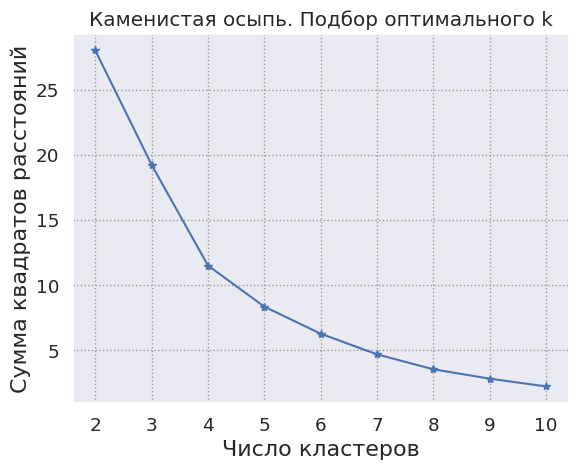

In [ ]:
K = range(2,11)
# вычисление значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=0).fit(df_factored) for k in K]
dist = [model.inertia_ for model in models]

# строим график каменистая осыпь
plt.plot(K, dist, marker='*')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Подбор оптимального k')
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=2, max_iter=300, n_init=10,
               verbose=0, tol=0.0001 )
model.fit(df_factored)

KMeans(n_clusters=3, n_init=10, random_state=2)

In [ ]:
if model.n_iter_ == 300:
    print("Не сошлось за ", model.n_iter_, " итераций")
else:
    print("Сошлось за ", model.n_iter_, " итераций")

Сошлось за  4  итераций


Четкого излома нет, но видно, что при числе кластеров большем, чем 5, наблюдается практически прямая линия. Выберем k = 2


In [ ]:
# получаем наборы кластеров в зависимости от числа кластеров
def get_kmeans_results_for_n_clusters(n):
    df_kmeans = df_factored.copy()
    model = KMeans(n_clusters=n, random_state=0).fit(df_kmeans)
    df_kmeans['cluster']=model.labels_
    print(f'Если кластеров {n}:')

    fig = sns.scatterplot(df_kmeans, x='factor1', y='factor2', hue='cluster', palette="deep")
    legend = fig.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    legend.get_frame().set_linewidth(1)
    plt.show()

    display(df_kmeans.groupby('cluster').mean()) # средние значения по столбцам

    # кто в какой кластер попал
    for num in range(n):
        print(f'cluster{num}:', list(df_kmeans[df_kmeans['cluster']==num].index))

Если кластеров 2:


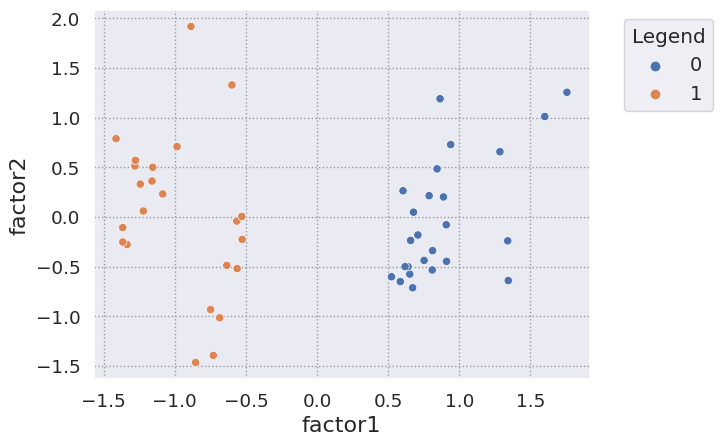

,factor1,factor2
cluster,,
0,0.887938,-0.024520
1,-0.965150,0.026652


cluster0: ['Amsterdam', 'Brussels', 'Chicago', 'Copenhagen', 'Dublin', 'Dusseldorf', 'Frankfurt', 'Geneva', 'Helsinki', 'Houston', 'London', 'Los_Angeles', 'Luxembourg', 'Madrid', 'Milan', 'Montreal', 'New_York', 'Oslo', 'Paris', 'Stockholm', 'Sydney', 'Tokyo', 'Toronto', 'Vienna', 'Zurich']
cluster1: ['Athens', 'Bogota', 'Bombay', 'Buenos_Aires', 'Cairo', 'Caracas', 'Hong_Kong', 'Jakarta', 'Johannesburg', 'Kuala_Lumpur', 'Lagos', 'Lisbon', 'Manila', 'Mexico_City', 'Nairobi', 'Nicosia', 'Panama', 'Rio_de_Janeiro', 'San_Paulo', 'Seoul', 'Singpore', 'Taipei', 'Tel_Aviv']


In [ ]:
get_kmeans_results_for_n_clusters(2)

На мой взгляд тут действительно 2 кластера, так как наилучшее значение силуэта при k=2

In [ ]:
# значения метрики силуэт
for i in range(2, 10):
  print(i, silhouette_score(df_factored, KMeans(n_clusters=i, random_state=0).fit(df_factored).labels_))



2 0.556638098812976
3 0.5072747059775206
4 0.5036175172778121
5 0.531968220812009
6 0.5447522947562752
7 0.4875642639843325
8 0.5075533740579944
9 0.5326377788328678


## Кластерный анализ методом DBSCAN

In [ ]:
# с параметрами по умолчанию
dbscan_0 = DBSCAN()

dbscan_0.fit(df_factored)

unique, counts = np.unique(dbscan_0.labels_, return_counts=True)
print('Объемы кластеров:\n', np.asarray((unique, counts)).T, '\n')

# списки кластеров
df_dbscan =df_factored.copy()
df_dbscan['labels'] = dbscan_0.labels_

for key, value in df_dbscan.groupby('labels').groups.items():
    print(f'cluster {key}:\n{list(value)}')

Объемы кластеров:
 [[-1  6]
 [ 0 22]
 [ 1  8]
 [ 2 12]] 

cluster -1:
['Geneva', 'Hong_Kong', 'Lagos', 'Los_Angeles', 'Taipei', 'Zurich']
cluster 0:
['Amsterdam', 'Brussels', 'Chicago', 'Copenhagen', 'Dublin', 'Dusseldorf', 'Frankfurt', 'Helsinki', 'Houston', 'London', 'Luxembourg', 'Madrid', 'Milan', 'Montreal', 'New_York', 'Oslo', 'Paris', 'Stockholm', 'Sydney', 'Tokyo', 'Toronto', 'Vienna']
cluster 1:
['Athens', 'Cairo', 'Jakarta', 'Lisbon', 'Nicosia', 'Rio_de_Janeiro', 'San_Paulo', 'Seoul']
cluster 2:
['Bogota', 'Bombay', 'Buenos_Aires', 'Caracas', 'Johannesburg', 'Kuala_Lumpur', 'Manila', 'Mexico_City', 'Nairobi', 'Panama', 'Singpore', 'Tel_Aviv']


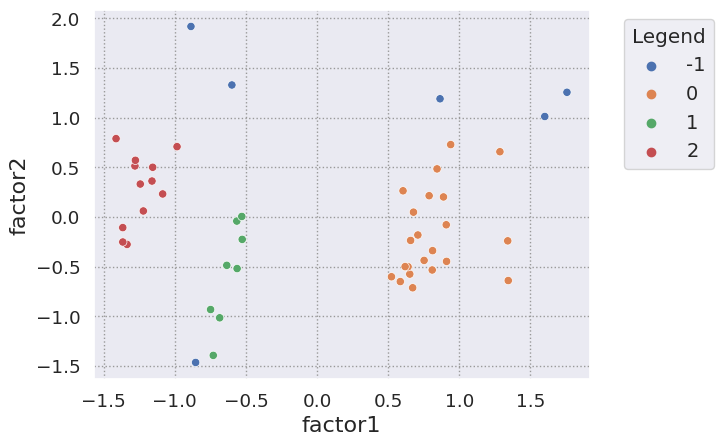

In [ ]:
fig = sns.scatterplot(df_dbscan, x='factor1', y='factor2', hue='labels', palette="deep")
legend = fig.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_linewidth(1)
plt.show()

Кажется, что DBSCAN справился с задачей гораздо хуже, зато он выделил автоматически выбросы (-1).

In [ ]:
# значение метрики
print(silhouette_score(df_factored, DBSCAN().fit(df_factored).labels_))

0.45503355449170196


In [ ]:
max = 0
for i in range(10):
  dbscan_4 = DBSCAN(eps=2, metric='euclidean', min_samples=2)

  dbscan_4.fit(df)

  unique, counts = np.unique(dbscan_4.labels_, return_counts=True)
  print(np.asarray((unique, counts)).T)

[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]
[[ 0 19]
 [ 1  9]
 [ 2 14]
 [ 3  6]]


In [ ]:
df_factored

,factor1,factor2
City,,
Amsterdam,0.585708,-0.650572
Athens,-0.561774,-0.519483
Bogota,-1.280138,0.514444
Bombay,-1.365723,-0.106848
Brussels,0.652337,-0.575142
Buenos_Aires,-1.221047,0.060797
Cairo,-0.563802,-0.041041
Caracas,-1.242534,0.332042
Chicago,0.844080,0.484796


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
features = ['Work', 'Price', 'Salary']
X = df[features]

def find_optimal_eps(data, min_eps, max_eps):
    # Инициализация переменных
    best_eps = -1
    best_silhouette = -1.0

    # Проход от максимального значения eps до минимального
    for current_eps in np.arange(max_eps, min_eps, -0.1):
        # Кластеризация с использованием текущего значения eps
        dbscan = DBSCAN(eps=current_eps, metric='euclidean', min_samples=2)
        labels = dbscan.fit_predict(X)

        # Подсчет количества кластеров
        num_clusters = len(np.unique(labels)) - 1  # Исключаем кластеры с меткой -1 (шумовые точки)

        if num_clusters > 1:
            # Подсчет силуэтной меры
            silhouette = silhouette_score(X, labels)

            # Обновление лучшего значения eps и силуэтной меры
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = current_eps

        # Печать текущего значения eps, силуэтной меры и количества кластеров
        print("eps = {}, силуэтная мера = {}, кластеров = {}".format(current_eps, best_silhouette, num_clusters))

    return best_eps

# Использование функции для поиска оптимального значения eps
min_eps = 0
max_eps = 10
optimal_eps = find_optimal_eps(df, min_eps, max_eps)

# Печать оптимального значения eps
print("Оптимальное значение eps:", optimal_eps)

eps = 10.0, силуэтная мера = -1.0, кластеров = 0
eps = 9.9, силуэтная мера = -1.0, кластеров = 0
eps = 9.8, силуэтная мера = -1.0, кластеров = 0
eps = 9.700000000000001, силуэтная мера = -1.0, кластеров = 0
eps = 9.600000000000001, силуэтная мера = -1.0, кластеров = 0
eps = 9.500000000000002, силуэтная мера = -1.0, кластеров = 0
eps = 9.400000000000002, силуэтная мера = -1.0, кластеров = 0
eps = 9.300000000000002, силуэтная мера = -1.0, кластеров = 0
eps = 9.200000000000003, силуэтная мера = -1.0, кластеров = 0
eps = 9.100000000000003, силуэтная мера = -1.0, кластеров = 0
eps = 9.000000000000004, силуэтная мера = -1.0, кластеров = 0
eps = 8.900000000000004, силуэтная мера = -1.0, кластеров = 0
eps = 8.800000000000004, силуэтная мера = -1.0, кластеров = 0
eps = 8.700000000000005, силуэтная мера = -1.0, кластеров = 0
eps = 8.600000000000005, силуэтная мера = -1.0, кластеров = 0
eps = 8.500000000000005, силуэтная мера = -1.0, кластеров = 0
eps = 8.400000000000006, силуэтная мера = -1.0, к

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
features = ['factor1', 'factor2']
X = df_factored[features]

def find_optimal_eps(data, min_eps, max_eps):
    # Инициализация переменных
    best_eps = -1
    best_silhouette = -1.0

    # Проход от максимального значения eps до минимального
    for current_eps in np.arange(max_eps, min_eps, -0.1):
        # Кластеризация с использованием текущего значения eps
        dbscan = DBSCAN(eps=current_eps, metric='euclidean', min_samples=2)
        labels = dbscan.fit_predict(X)

        # Подсчет количества кластеров
        num_clusters = len(np.unique(labels)) - 1  # Исключаем кластеры с меткой -1 (шумовые точки)

        if num_clusters > 1:
            # Подсчет силуэтной меры
            silhouette = silhouette_score(X, labels)

            # Обновление лучшего значения eps и силуэтной меры
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = current_eps

        # Печать текущего значения eps, силуэтной меры и количества кластеров
        print("eps = {}, силуэтная мера = {}, кластеров = {}".format(current_eps, best_silhouette, num_clusters))

    return best_eps

# Использование функции для поиска оптимального значения eps
min_eps = 0
max_eps = 10
optimal_eps_f = find_optimal_eps(df, min_eps, max_eps)

# Печать оптимального значения eps
print("Оптимальное значение eps:", optimal_eps)

eps = 10.0, силуэтная мера = -1.0, кластеров = 0
eps = 9.9, силуэтная мера = -1.0, кластеров = 0
eps = 9.8, силуэтная мера = -1.0, кластеров = 0
eps = 9.700000000000001, силуэтная мера = -1.0, кластеров = 0
eps = 9.600000000000001, силуэтная мера = -1.0, кластеров = 0
eps = 9.500000000000002, силуэтная мера = -1.0, кластеров = 0
eps = 9.400000000000002, силуэтная мера = -1.0, кластеров = 0
eps = 9.300000000000002, силуэтная мера = -1.0, кластеров = 0
eps = 9.200000000000003, силуэтная мера = -1.0, кластеров = 0
eps = 9.100000000000003, силуэтная мера = -1.0, кластеров = 0
eps = 9.000000000000004, силуэтная мера = -1.0, кластеров = 0
eps = 8.900000000000004, силуэтная мера = -1.0, кластеров = 0
eps = 8.800000000000004, силуэтная мера = -1.0, кластеров = 0
eps = 8.700000000000005, силуэтная мера = -1.0, кластеров = 0
eps = 8.600000000000005, силуэтная мера = -1.0, кластеров = 0
eps = 8.500000000000005, силуэтная мера = -1.0, кластеров = 0
eps = 8.400000000000006, силуэтная мера = -1.0, к

In [ ]:



dbscan_4 = DBSCAN(eps=2.1, metric='euclidean', min_samples=2)
dbscan_4.fit(df)

unique, counts = np.unique(dbscan_4.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 25]
 [ 1  9]
 [ 2 14]]


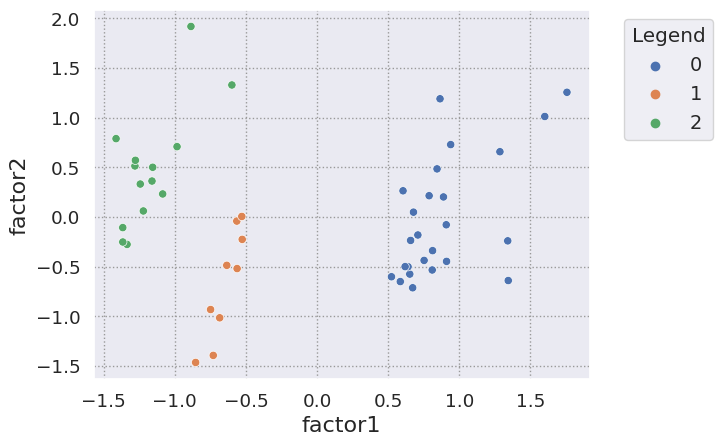

In [ ]:
# списки кластеров
df_dbscan =df_factored.copy()
df_dbscan['labels'] = dbscan_4.labels_
fig = sns.scatterplot(df_dbscan, x='factor1', y='factor2', hue='labels', palette="deep")
legend = fig.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_linewidth(1)
plt.show()

In [ ]:

dbscan_4 = DBSCAN(eps=1.5, metric='euclidean', min_samples=2)
dbscan_4.fit(df)
unique, counts = np.unique(dbscan_4.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  2]
 [ 0 19]
 [ 1  9]
 [ 2 12]
 [ 3  2]
 [ 4  4]]


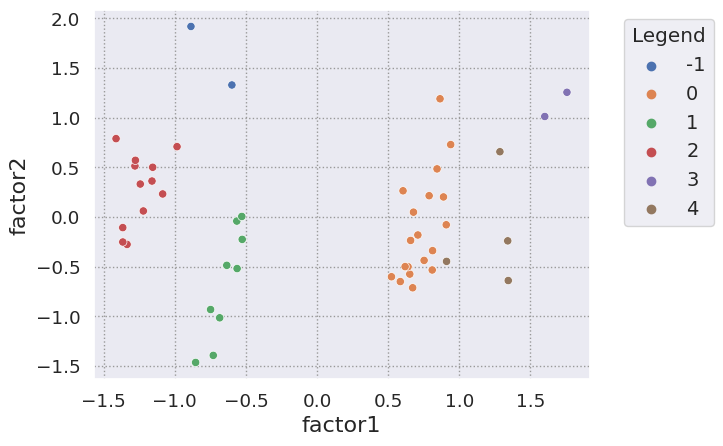

In [ ]:
# списки кластеров
df_dbscan =df_factored.copy()
df_dbscan['labels'] = dbscan_4.labels_
fig = sns.scatterplot(df_dbscan, x='factor1', y='factor2', hue='labels', palette="deep")
legend = fig.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_linewidth(1)
plt.show()

In [ ]:
# значения метрики силуэт
for i in range(2, 10):
  print(i, silhouette_score(df_factored, KMeans(n_clusters=i, random_state=0).fit(df_factored).labels_))

2 0.556638098812976
3 0.5072747059775206
4 0.5036175172778121
5 0.531968220812009
6 0.5447522947562752
7 0.4875642639843325
8 0.5075533740579944
9 0.5326377788328678


In [ ]:
# Подготовка данных для кластеризации
features = ['Work', 'Price', 'Salary']
X = df[features]

# Иерархическая кластеризация
#hierarchical = AgglomerativeClustering(n_clusters=3)
df['cluster'] = fcluster(link, h, criterion='distance')
hierarchical_labels = df['cluster']
hierarchical_score = silhouette_score(X, df['cluster'])

df['cluster2'] = fcluster(link, 2, criterion='distance')
hierarchical_labels_2 = df['cluster2']
hierarchical_score_2 = silhouette_score(X, df['cluster2'])

# K-means
kmeans_2 = KMeans(n_clusters=2, random_state=2)
kmeans_7 = KMeans(n_clusters=7, random_state=2)
kmeans_labels_2 = kmeans.fit_predict(X)
kmeans_labels_7 = kmeans.fit_predict(X)
kmeans_score_2 = silhouette_score(X, kmeans_labels_2)
kmeans_score_7 = silhouette_score(X, kmeans_labels_7)

# DBSCAN
dbscan = DBSCAN(eps=optimal_eps, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)
dbscan_score = silhouette_score(X, dbscan_labels)

# Вывод результатов
print("Коэффициент силуэта для иерархической кластеризации (2 кластера):", hierarchical_score)
print("Коэффициент силуэта для иерархической кластеризации (7 кластеров):", hierarchical_score_2)
print("Коэффициент силуэта для K-means (2 кластера):", kmeans_score_2)
print("Коэффициент силуэта для K-means (7 кластеров):", kmeans_score_7)
print("Коэффициент силуэта для DBSCAN (6 кластеров):", dbscan_score)

NameError: ignored

In [ ]:
# Подготовка данных для кластеризации
features = ['factor1', 'factor2']
X = df_factored[features]

# Иерархическая кластеризация
#hierarchical = AgglomerativeClustering(n_clusters=3)
df_factored['cluster'] = fcluster(link, h, criterion='distance')
hierarchical_labels = df_factored['cluster']
hierarchical_score = silhouette_score(X, df_factored['cluster'])

df_factored['cluster2'] = fcluster(link, 2, criterion='distance')
hierarchical_labels_2 = df_factored['cluster2']
hierarchical_score_2 = silhouette_score(X, df_factored['cluster2'])

# K-means
kmeans_2 = KMeans(n_clusters=2, random_state=2)
kmeans_7 = KMeans(n_clusters=7, random_state=2)
kmeans_labels_2 = kmeans.fit_predict(X)
kmeans_labels_7 = kmeans.fit_predict(X)
kmeans_score_2 = silhouette_score(X, kmeans_labels_2)
kmeans_score_7 = silhouette_score(X, kmeans_labels_7)

# DBSCAN
dbscan = DBSCAN(eps=optimal_eps_f, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)
dbscan_score = silhouette_score(X, dbscan_labels)

# Вывод результатов
print("Коэффициент силуэта для иерархической кластеризации (2 кластера):", hierarchical_score)
print("Коэффициент силуэта для иерархической кластеризации (7 кластеров):", hierarchical_score_2)
print("Коэффициент силуэта для K-means (2 кластера):", kmeans_score_2)
print("Коэффициент силуэта для K-means (7 кластеров):", kmeans_score_7)
print("Коэффициент силуэта для DBSCAN (6 кластеров):", dbscan_score)

NameError: ignored

Хорошие показатели иерархической кластеризации и k-means обусловлены относительно чистым датасетом с маленьким набором данных. Для большего набора данных я бы использовала DBSCAN.при таком же количестве кластеров удается добиться лучшей силуэтной меры. При использовании факторного анализа коэффициенты силуэтной меры выше